### Setup

In [1]:
from utils import DitheredPainter, Frame
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

save_dir = 'resources/'

dmd = Frame()
painter = DitheredPainter(nrows=dmd.real_nrows, ncols=dmd.real_ncols, dither_method='Floyd-Steinberg')

In [2]:
dmd.dmd_nrows, dmd.dmd_ncols, dmd.real_nrows, dmd.real_ncols

(1140, 912, 1482, 1481)

### Discrete Fourier Transform

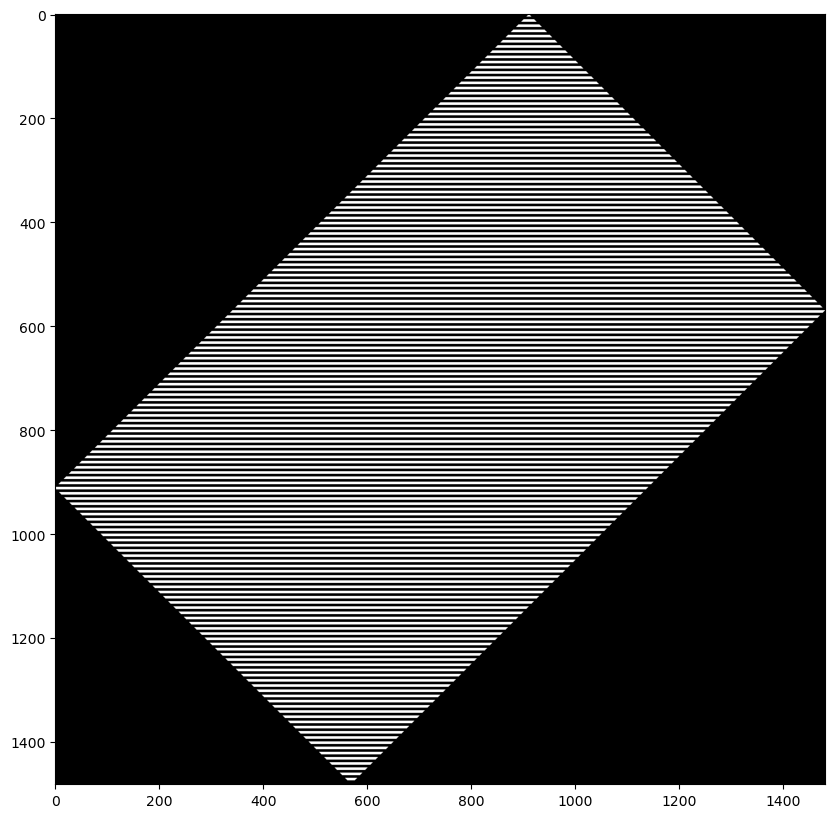

In [59]:
w = 5
dmd.drawPattern(painter.drawHorizontalStrips(width=w), color=1)

real_array = dmd.real_array.sum(axis=2).astype(float)
real_array[dmd.bg_rows, dmd.bg_cols] = 0

plt.figure(figsize=(10, 10))
plt.imshow(real_array, cmap='gray')
plt.show()

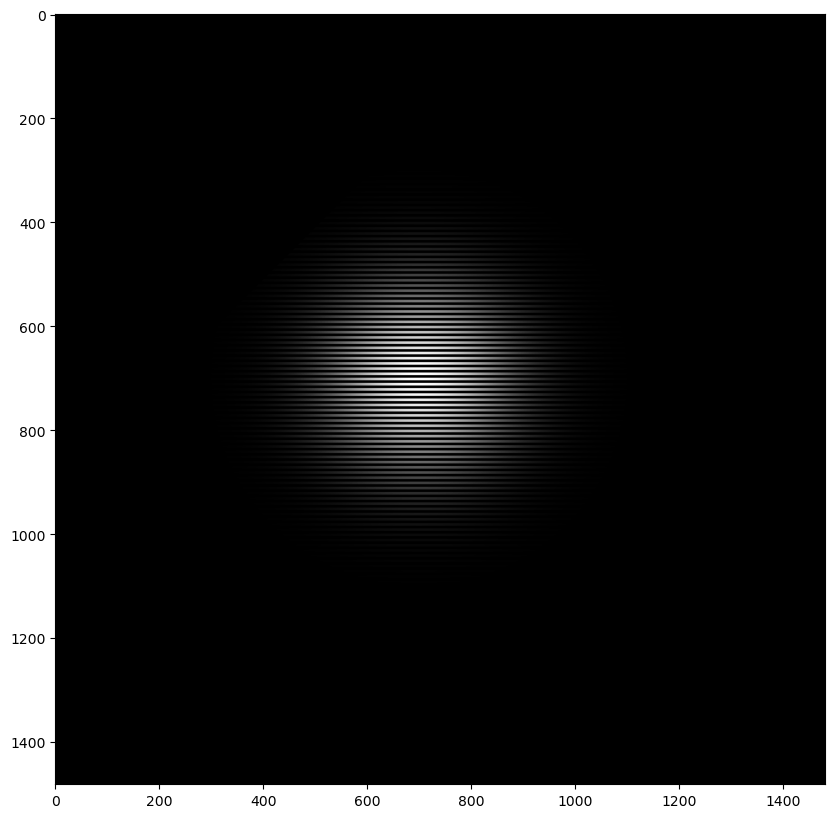

In [60]:
# add intensity mask
intensity = lambda x, y, x0, y0, wx, wy: np.exp(-(((x-x0)/wx)**2 + ((y-y0)/wy)**2) / 2)
mask = intensity(dmd.dmd_rows, dmd.dmd_cols, 700, 700, 120, 120)
real_array[dmd.dmd_rows, dmd.dmd_cols] *= mask

plt.figure(figsize=(10, 10))
plt.imshow(real_array, cmap='gray')

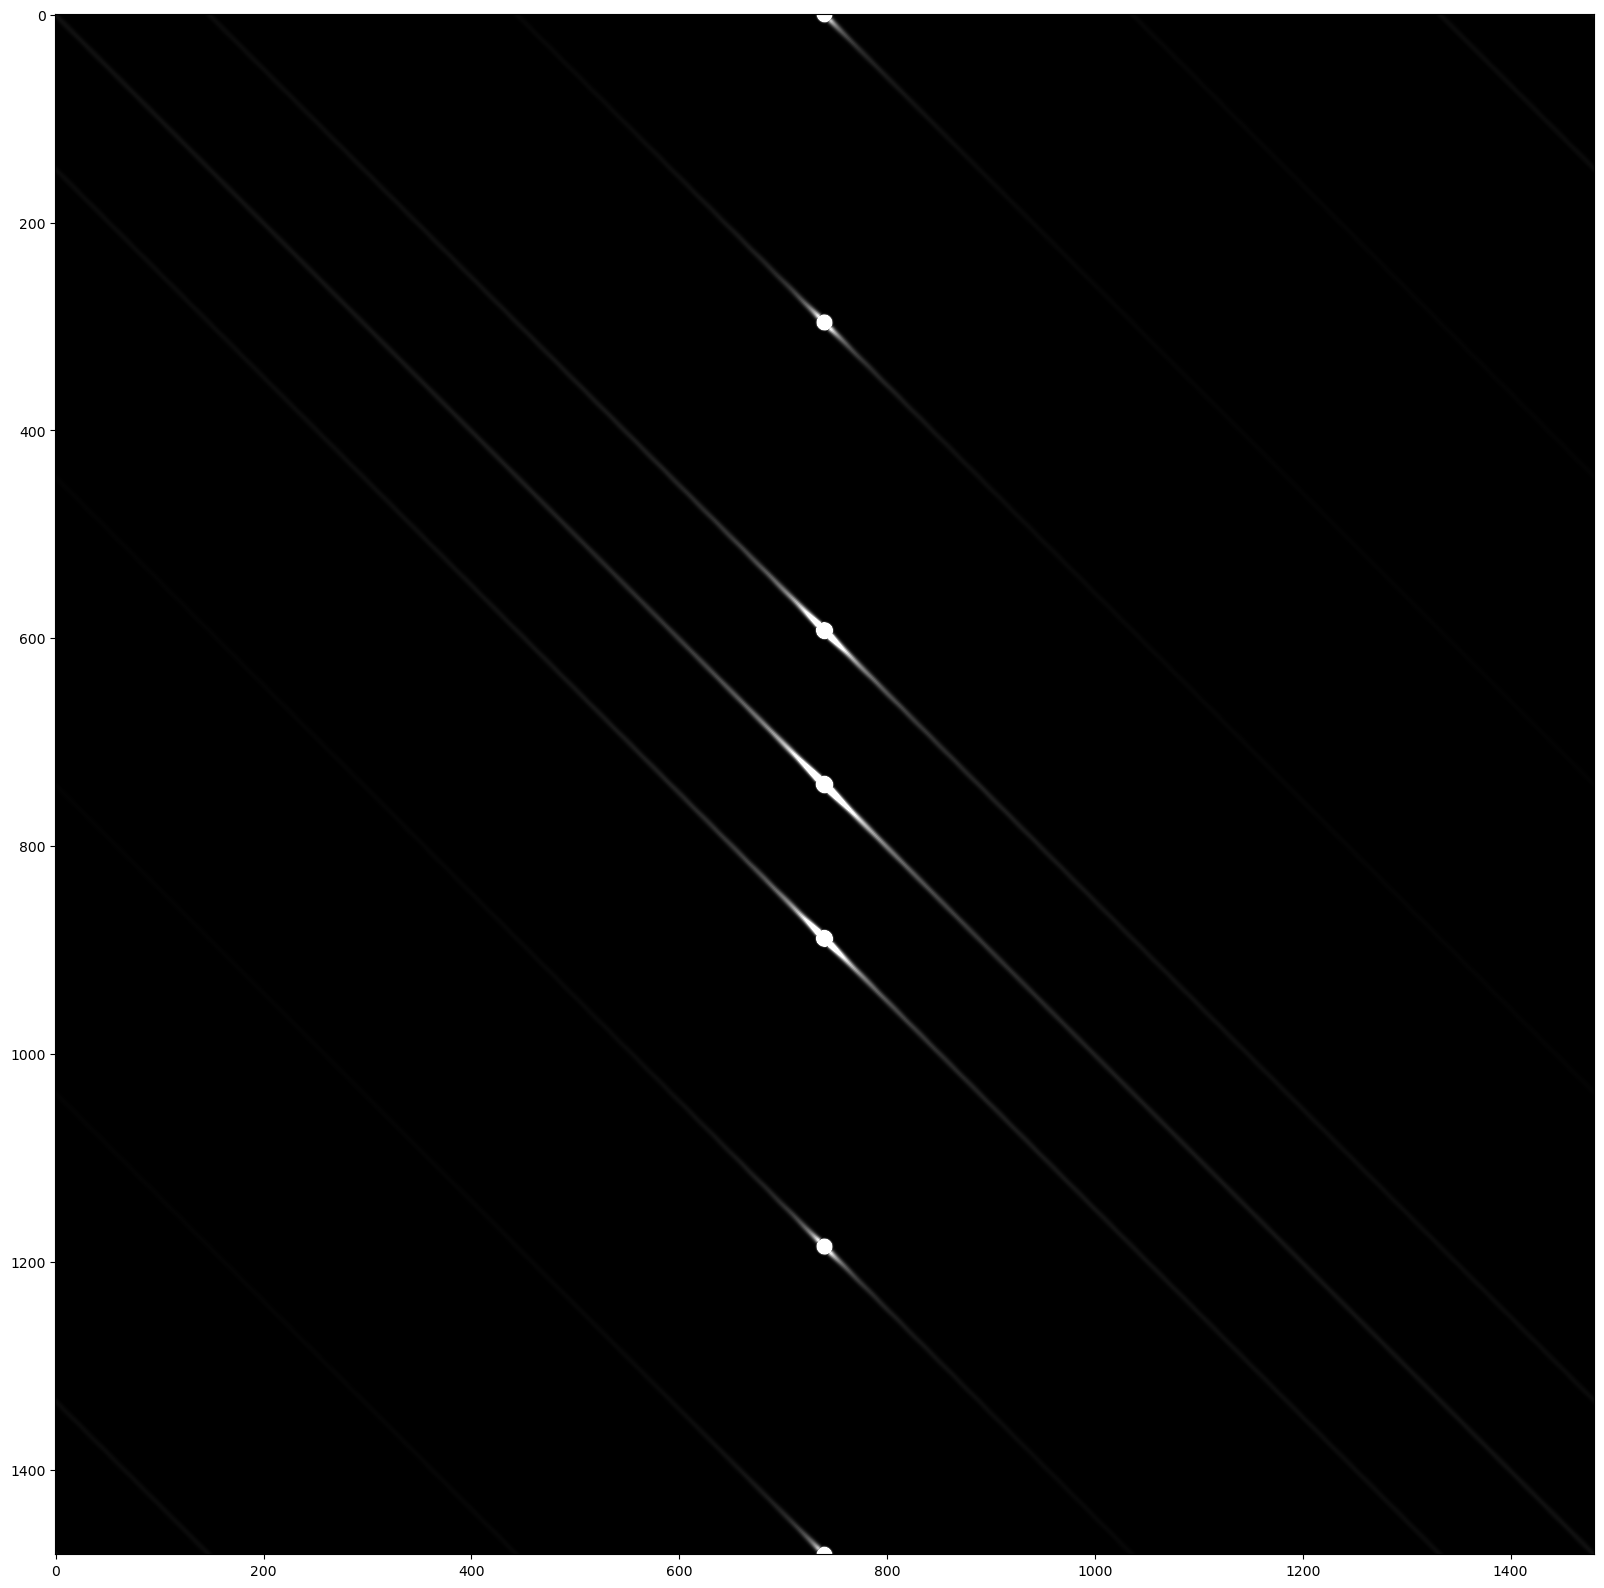

In [61]:
fourier = np.fft.fft2(real_array)
fourier = np.fft.fftshift(fourier)
fourier = np.abs(fourier)

plt.figure(figsize=(20, 20))
plt.imshow(fourier, cmap='gray', vmax=1e4)
plt.show()

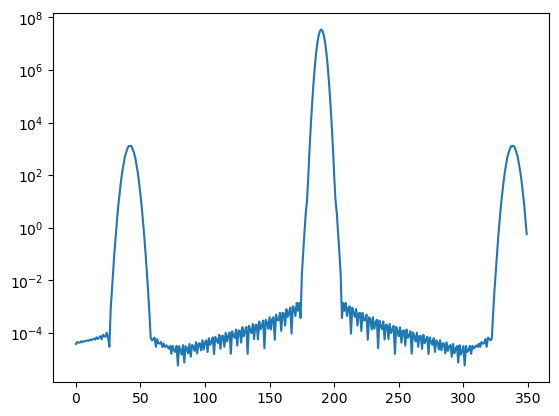

In [71]:
xrange = 550, 900
plt.plot(fourier[1482//2, xrange[0]:xrange[1]])
plt.yscale('log')
plt.show()